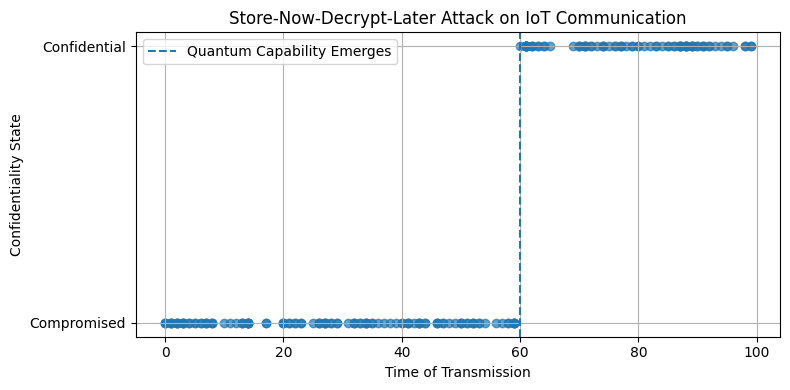

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Simulation Parameters
# -----------------------------
NUM_PACKETS = 200            # number of transmitted packets
TIME_HORIZON = 100           # total time units
QUANTUM_ARRIVAL_TIME = 60    # time when quantum adversary becomes capable

# -----------------------------
# Generate Transmission Times
# -----------------------------
np.random.seed(42)
transmission_times = np.sort(
    np.random.randint(0, TIME_HORIZON, size=NUM_PACKETS)
)

# -----------------------------
# Model Confidentiality State
# -----------------------------
# 1 = confidential, 0 = compromised
confidentiality_state = []

for t in transmission_times:
    if t < QUANTUM_ARRIVAL_TIME:
        confidentiality_state.append(0)
    else:
        confidentiality_state.append(1)

confidentiality_state = np.array(confidentiality_state)

# -----------------------------
# Plot Results
# -----------------------------
plt.figure(figsize=(8, 4))
plt.scatter(
    transmission_times,
    confidentiality_state,
    alpha=0.7
)
plt.axvline(
    QUANTUM_ARRIVAL_TIME,
    linestyle='--',
    label='Quantum Capability Emerges'
)

plt.yticks([0, 1], ['Compromised', 'Confidential'])
plt.xlabel('Time of Transmission')
plt.ylabel('Confidentiality State')
plt.title('Store-Now-Decrypt-Later Attack on IoT Communication')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Explanation of the Store-Now-Decrypt-Later (SNDL) Baseline Experiment
This experiment implements a baseline instantiation of the store-now-decrypt-later threat model for IoT and edge communications in the presence of a quantum-capable adversary. The objective is not to evaluate a defense, but to explicitly demonstrate how confidentiality degrades over time once the adversary acquires quantum computational capability.

In the simulation, an IoT device transmits encrypted packets over a finite time horizon, where each packet is assumed to be protected using classical public-key–based key establishment. An adversary passively eavesdrops on the communication channel and records all encrypted packets without performing any active manipulation or decryption attempt at the time of transmission. This models a realistic low-cost, stealthy attacker that exploits future cryptanalytic advances rather than immediate computational power.

A critical time instant, denoted as the quantum capability emergence time, is introduced to represent the point at which the adversary becomes capable of executing quantum algorithms sufficient to break the underlying classical public-key cryptography. Once this threshold is crossed, the adversary retroactively decrypts all previously recorded ciphertexts whose security relied on quantum-vulnerable primitives. Packets transmitted after this time are not considered compromised within the simulation horizon, as they are not assumed to be available to the attacker prior to key recovery.

The plotted graph maps the time of packet transmission on the horizontal axis to the confidentiality state on the vertical axis, where a binary value indicates whether the packet ultimately remains confidential or becomes compromised. Packets transmitted before the quantum capability threshold are marked as compromised, reflecting the delayed but inevitable loss of confidentiality. In contrast, packets transmitted after the threshold remain confidential, as they are not subject to retroactive decryption in the modeled window.

This result highlights a fundamental limitation of classical cryptographic protection in the quantum era: confidentiality becomes time-bounded rather than absolute. Even though all packets were cryptographically secure at the time of transmission, their long-term confidentiality collapses once the adversary’s computational capabilities evolve. Importantly, this compromise occurs without any protocol violation, anomaly, or detectable attack behavior at runtime.

The significance of this baseline experiment lies in establishing a reference point for subsequent evaluations. It formalizes the intuition that classical encryption alone cannot guarantee long-term confidentiality for IoT and edge systems and motivates the need for security mechanisms that explicitly account for temporal validity, confidentiality persistence, and delayed adversarial capabilities. All subsequent experiments build upon this baseline by introducing probabilistic key recovery, message lifetimes, and attack success metrics to quantify the severity of quantum-era threats beyond this idealized worst-case model.